Saving House_dataset.csv to House_dataset (3).csv
Mean Absolute Error (MAE): 1630891.042246231
Mean Squared Error (MSE): 9895722180224.795
R-squared (R2): 0.9135447759048524
R-squared (R2) as a percentage: 91.35%


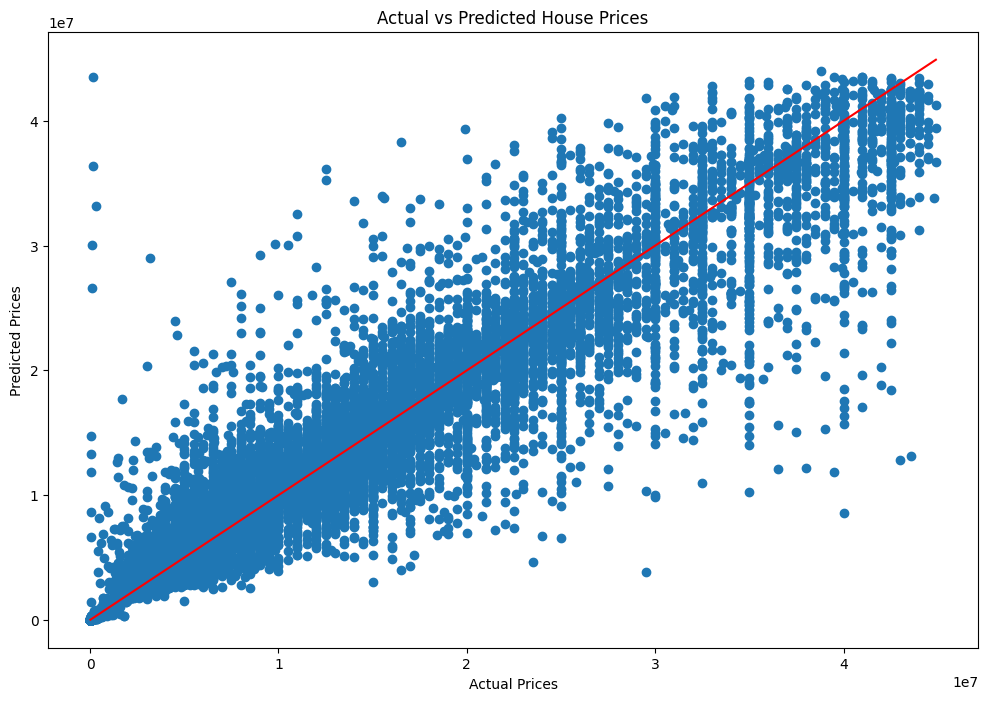

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from google.colab import files
import io

# when you will run the program it will ask for dataset then simply upload it by selecting the attached dataset once downloaded in your computer

uploaded = files.upload()
filename = next(iter(uploaded))


df= pd.read_csv(io.BytesIO(uploaded[filename]))

# Distribute numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if 'price' in numerical_cols:
    numerical_cols.remove('price')

# Data Cleaning for Numbers Task  1
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Data Cleaning for Strings
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Feature Engineering Task 2
# Preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Task 3
# Model selection and Training
model = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

X = df.drop('price', axis=1)
y = df['price']

# Alotting 20% Data to Test and 80% for Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Task 4
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print(f"R-squared (R2) as a percentage: {r2 * 100:.2f}%")

# Adding Graph just to accuracy of Model
# Visualize actual vs predicted prices
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # Ensure line starts and ends at the min and max of actual prices
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()